# Solucion ecuacion diferencial por ecuaciones en diferencias

La ecuacion a solucionar es

$$
y''(t)+y'(t)+y(t) = 0
$$

$y(0) = 1$

$y'(0) = -0.5$




### Ecuaciones en diferencias

se puede discretizar una ecuacion diferencial de la siguiente manera:

tomar las siguientes aproximaciones

$\frac{dy(t)}{dt}\rightarrow\frac{y[n]-y[n-1]}{Tm}$

$\frac{d^2y(t)}{dt^2}\rightarrow\frac{y[n]-2y[n-1]+y[n-2]}{Tm^2}$

$\frac{d^3y(t)}{dt^3}\rightarrow\frac{y[n]+3y[n-1]+3y[n-2]-y[n-3]}{Tm^3}$

La discretizacion de la ecuacion se realiza ase:

$y''(t)+y'(t)+y(t) = 0$ se puede transformar en:

$\frac{y[n]-2y[n-1]+y[n-2]}{Tm^2}+\frac{y[n]-y[n-1]}{Tm}+y[n]=0$

Esto se simplifica como

$\frac{y[n]-2y[n-1]+y[n-2]+Tm y[n]-Tm y[n-1] +Tm^2 y^n}{Tm^2}=0$

Simplificando nos queda

$y[n](1+Tm+Tm^2) - y[n-1](2+Tm) + y[n-2] = 0$

y las condiciones iniciales quedarian

$y(0) = 1$, entonces $y[0] = 1$

$y'(0) = -0.5$, entonces $\frac{y[1]-y[0]}{Tm} = -0.5$

sumando ambas ecuaciones nos queda que

$y[1] = 1-0.5*Tm$

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

### Solucion analitica

http://blog.espol.edu.ec/analisisnumerico/edo-lineal-solucion-complementaria-y-particular-con-sympy/

In [6]:
t = sym.Symbol('t')
i = sym.Function('i')
v = sym.Function('v')
R = 5
L = 0.01
C = 1E-6


# Se plantea la ecuacion diferencial
f = sym.diff(i(t),t,2) - (R/L)*sym.diff(i(t),t,1) - (1/(L*C))*i(t) 
g = (1/L)*sym.diff(v(t),t,1)
eq = sym.Eq(f,g)

# Condiciones iniciales
i_cond = {i(0): 0, sym.diff(i(t),t,1).subs(t,0) : (10/L)}

sym.pprint(eq)

                                       2                       
                          d           d                d       
-100000000.0⋅i(t) - 500.0⋅──(i(t)) + ───(i(t)) = 100.0⋅──(v(t))
                          dt           2               dt      
                                     dt                        


In [7]:
#Entrada conocida
vp = 10*sym.cos(3500*t)

In [8]:
sym.classify_ode(eq, i(t))

('factorable',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

In [16]:
# Solucion homogenea, v(t) = 0
RHSx0 = eq.rhs.subs(v(t),0).doit()
LHSx0 = eq.lhs.subs(v(t),0).doit()
homogenea = LHSx0 - RHSx0

sym.pprint(homogenea)

# solucion general de ecuación homogénea
ic = sym.dsolve(homogenea, i(t),ics=i_cond)
ic = ic.expand()
sym.pprint(ic)

                                       2      
                          d           d       
-100000000.0⋅i(t) - 500.0⋅──(i(t)) + ───(i(t))
                          dt           2      
                                     dt       
                           10253.1245118713⋅t                       -9753.1245
i(t) = 0.0499843823204061⋅ℯ                   - 0.0499843823204061⋅ℯ          

1187128⋅t
         


In [15]:
# Solucion particular
# ecuación particular x(t)=0, estado cero
RHSxp = eq.rhs.subs(v(t),vp).doit()
LHSxp = eq.lhs.subs(v(t),vp).doit()
particular = LHSxp - RHSxp

sym.pprint(particular)

# solucion particular de ecuación homogénea
ip = sym.dsolve(particular, i(t))

sym.pprint(ip)

                                                               2      
                                                  d           d       
-100000000.0⋅i(t) + 3500000.0⋅sin(3500⋅t) - 500.0⋅──(i(t)) + ───(i(t))
                                                  dt           2      
                                                             dt       
           -9753.12451187128⋅t       10253.1245118713⋅t                       
i(t) = C₁⋅ℯ                    + C₂⋅ℯ                   + 0.0311728242003471⋅s

                                                 
in(3500.0⋅t) - 0.000485990577733697⋅cos(3500.0⋅t)


In [18]:
# particular sin terminos Ci
i_Ci = ip.free_symbols
i_Ci.remove(t) # solo Ci
for Ci in i_Ci: 
    ip = ip.subs(Ci,0)

In [19]:
# Se soluciona la ecuacion diferencial
itotal = ic.rhs + ip.rhs

sym.pprint(eq)

sym.pprint(itotal) # rhs soo toma la solucion

                                       2                       
                          d           d                d       
-100000000.0⋅i(t) - 500.0⋅──(i(t)) + ───(i(t)) = 100.0⋅──(v(t))
                          dt           2               dt      
                                     dt                        
                    10253.1245118713⋅t                                        
0.0499843823204061⋅ℯ                   + 0.0311728242003471⋅sin(3500.0⋅t) - 0.

                                                       -9753.12451187128⋅t
000485990577733697⋅cos(3500.0⋅t) - 0.0499843823204061⋅ℯ                   


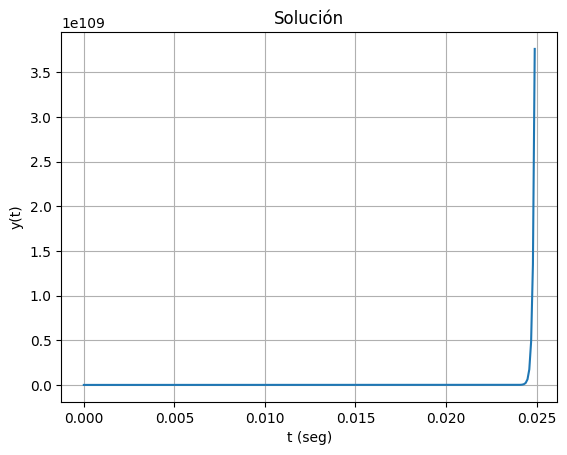

In [21]:
equivalentes = [{'DiracDelta': lambda x: 1*(x==0)},
                {'Heaviside': lambda x,y: np.heaviside(x, 1)},
                'numpy',] #, {'h':h}]
                
Tm = 0.0001
tm = np.arange(0,0.025,Tm)
i_t = sym.lambdify(t, itotal, modules=equivalentes)
it = i_t(tm)

plt.plot(tm,it)
plt.xlabel("t (seg)")
plt.ylabel("y(t)")
plt.title("Solución")
plt.grid(True)

### Solucion por ecuaciones en diferencias

$y[n](1+Tm+Tm^2) - y[n-1](2+Tm) + y[n-2] = 0$

La podemos reescribir como:

$y[n] = \frac{y[n-1]*C2-y[n-2]}{C1}$

Donde $C1 = (1+Tm+Tm^2)$, $C2 = (2+Tm)$, $y[0] = 1$ y $y[1] = 1-0.5*Tm$

In [ ]:
Tm = 0.01
t = np.arange(0,20,Tm)
y = np.zeros(len(t))

y[0] = 1
y[1] = 1-0.5*Tm # condiciones iniciales

c1 = 1+Tm+Tm**2
c2 = 2+Tm

for n in range(2,len(t)):
    y[n] = (y[n-1]*c2-y[n-2])/c1

plt.plot(t,y)
plt.xlabel("t (seg)")
plt.ylabel("y[n]")
plt.title("Solución")
plt.grid(True)
